# Прогнозирование временных рядов

In [2]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Вопрос 1. 
Какие компоненты обычно выделяют во временных рядах?

* Ошибка*
* Итерация
* Календарность
* Тенденция
* Сезонность*
* Заблуждение
* Цикл*
* Тренд*

## Вопрос 2. 
Какие особенности характерны для временных рядов?

* Значение признака, измерения которого составляют ряд, могут колебаться, но их распределение во времени не меняется
* Временной ряд — это набор пар (t,yt), где t — произвольные моменты времени, а yt — значения признака y в эти моменты
* Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом.*

## Вопрос 3. 
Из каких слагаемых состоит модель ARMA(p,q)?

* p предыдущих значений ошибки с постоянными коэффициентами
* Константа α*
* Ошибка εt*
* p предыдущих значений ряда с постоянными коэффициентами*

## Вопрос 4. 
Какие из параметров модели SARIMA настраиваются с помощью метода наименьших квадратов?

* Длина сезонного периода S
* Порядки авторегрессионных компонент p,P
* Значение константы α*
* Порядки дифференцирования d,D
* Порядки компонент скользящего среднего q,Q
* Значения коэффициентов ϕ и θ перед предыдущими значениями ряда и предыдущими значениями ошибки*

## Вопрос 5. 
Какой эвристический метод позволяет выбрать начальное приближение для гиперпараметров p и P в сезонной модели ARIMA?

* Анализ частичной автокорреляционной функции*
* Анализ автокорреляционной функции
* Анализ распределения червей в гнилой печени овцы

## Вопрос 6. 
В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

`monthly-milk-production.csv`

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции `monthrange` из пакета `calendar`). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [3]:
import pandas as pd
from matplotlib import pylab as plt
%matplotlib inline

In [4]:
milk = pd.read_csv('monthly-milk-production.csv',';',
                   index_col=['month'], parse_dates=['month'],
                   dayfirst=True)

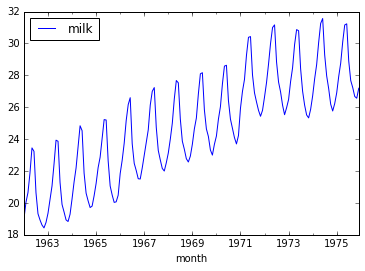

In [5]:
milk_day =pd.DataFrame(milk.milk/milk.index.days_in_month)
milk_day.plot()
plt.show()

## Вопрос 7. 
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

```python
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
```
Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции `shift`:

```python
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
```
При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (`NaN`). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

* Дифференцирование не нужно, исходный ряд уже стационарен
* Ряд становится стационарным после однократного дифференцирования
* Ряд становится стационарным после сезонного дифференцирования
* Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

In [14]:
# milk.daily_diff1 = milk.milk - milk.milk.shift(1)
# milk.daily_diff12 = milk.milk - milk.milk.shift(12)
# milk.daily_diff12_1 = milk.daily_diff12 - milk.daily_diff12.shift(12)
milk_day['daily_diff'] = milk_day.milk - milk_day.milk.shift(12)
milk_day['daily_diff1'] = milk_day.daily_diff -\
milk_day.daily_diff.shift(1)

Критерий Дики-Фуллера: p=0.000002


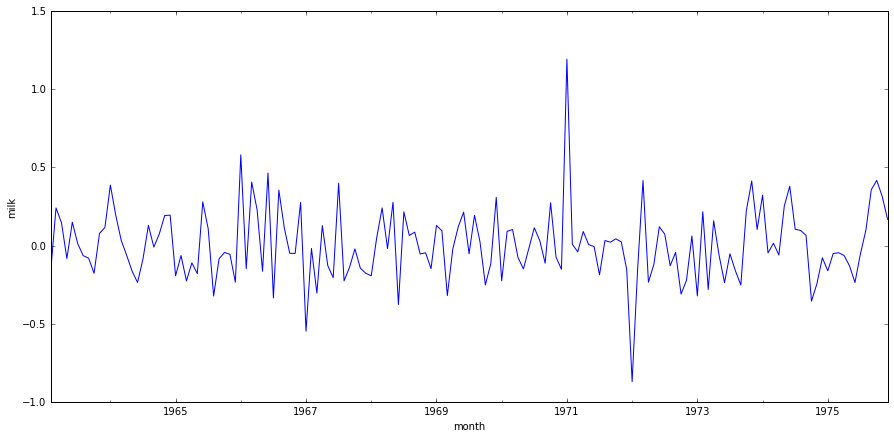

In [17]:
plt.figure(figsize(15,7))
milk_day.daily_diff1[13:].plot()
plt.ylabel(u'milk')
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk_day.daily_diff1[13:])[1])

## Вопрос 8. 
Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

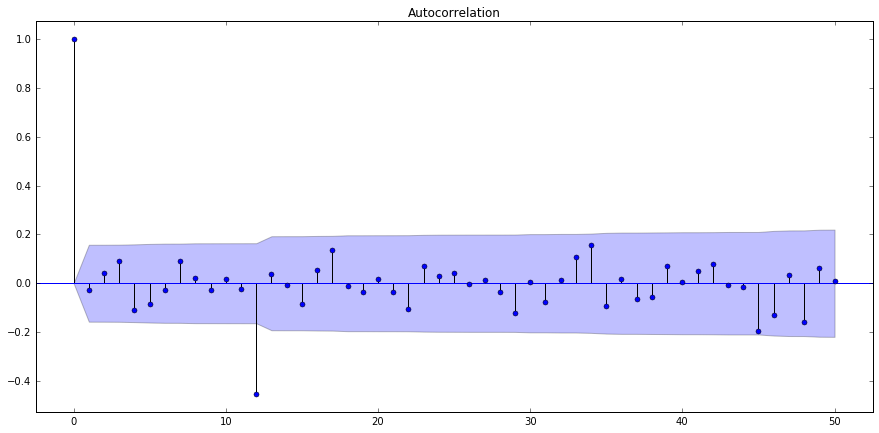

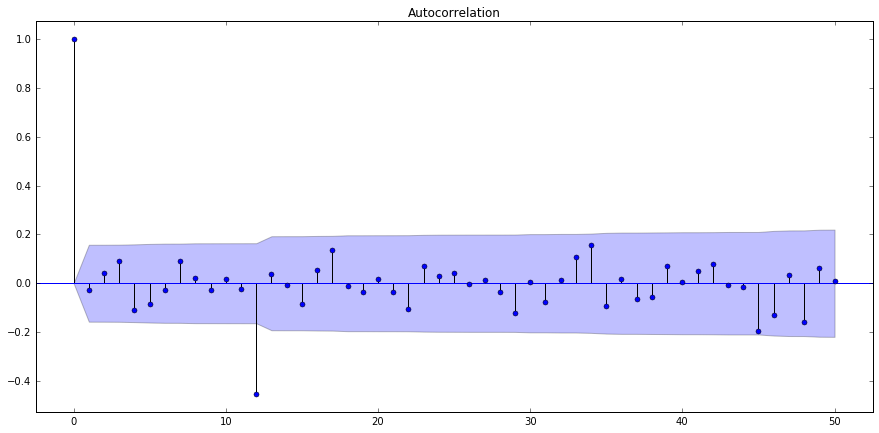

In [20]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk_day.daily_diff1[13:].values.squeeze(), lags=50)

## Вопрос 9. 
Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


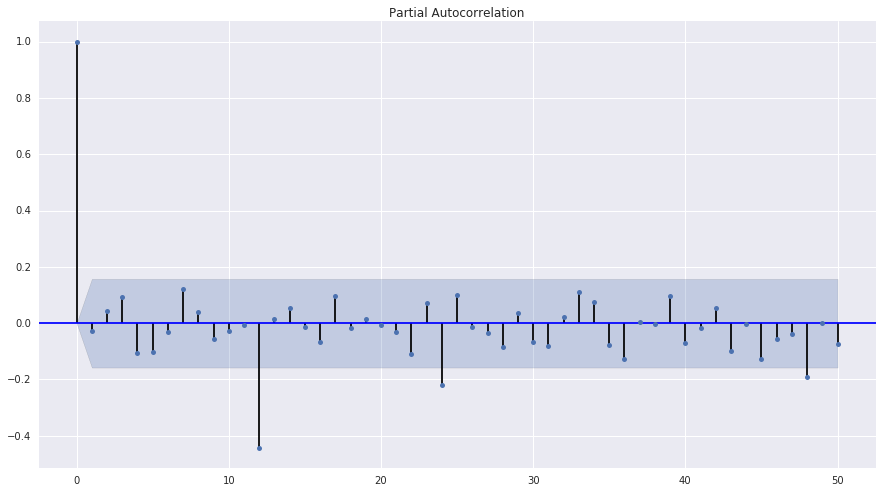

In [25]:
plt.figure(figsize(15,8))
sm.graphics.tsa.plot_pacf(milk_day.daily_diff1[13:].values.squeeze(), lags=50)
pylab.show()